<a href="https://colab.research.google.com/github/nin-ed/NLP-Algorithms/blob/main/Prediction_Based_Word_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import random
import gensim.downloader as api
import pprint

In [11]:
def load_model():
  wv_bin = api.load("glove-wiki-gigaword-200")
  return wv_bin

In [12]:
def mat_of_vecs(wv_bin, req_words):
  words = list(wv_bin.vocab.keys())
  ## Shuffle
  random.seed(224)
  random.shuffle(words)
  words = words[:10000]

  word2idx = {}
  mat = []
  i = 0
  for w in words:
    try:
      mat.append(wv_bin.word_vec(w))
      word2idx[w] = i
      i += 1
    except KeyError:
      continue
  for w in req_words:
    if w in words:
      continue
    try:
      mat.append(wv_bin.word_vec(w))
      word2idx[w] = i
      i += 1
    except KeyError:
      continue
  
  mat = np.stack(mat)
  return mat, word2idx

In [13]:
def reduce_to_n(mat, n=2):
  iters = 10
  svd = TruncatedSVD(n_components=n, n_iter=iters)
  return svd.fit_transform(mat)

In [18]:
def plot(mat, word2idx, words):
  plt.figure(figsize=(10, 6))
  for word in words:
    i = word2idx[word]
    emb = mat[i]
    x, y = emb[0], emb[1]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x, y, word, fontsize=10)
  plt.show()

In [20]:
words = ['barrels', 'bpd', 'energy', 'industry', 'oil', 'petroleum', 'kuwait', 'venezuela', 'ecuador']

wv_bin = load_model()
mat, word2idx = mat_of_vecs(wv_bin, req_words=words)
mat_reduced = reduce_to_n(mat, n=2)
mat_red_lengths = np.linalg.norm(mat_reduced, axis=1)
mat_red_norm = mat_reduced / mat_red_lengths[:, np.newaxis]

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


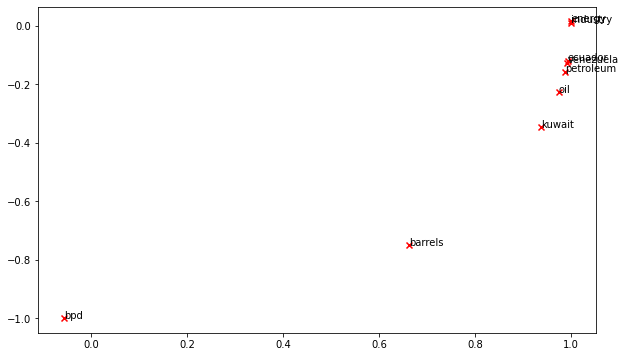

In [21]:
plot(mat_red_norm, word2idx, words)

In [17]:
## Examples
print(wv_bin.most_similar("chair"))

w1, w2, w3 = "man", "king", "woman"
w1_w2_dist = wv_bin.distance(w1, w2)
w1_w3_dist = wv_bin.distance(w1, w3)
print(f"Cosine distance between {w1} and {w2} (Synonyms): {w1_w2_dist}")
print(f"Cosine distance between {w1} and {w3} (Antonyms): {w1_w3_dist}")

[('chairs', 0.7992520332336426), ('sitting', 0.5966616868972778), ('head', 0.5494985580444336), ('seat', 0.5444086790084839), ('sits', 0.5396796464920044), ('sit', 0.5316585302352905), ('sat', 0.531306266784668), ('chaired', 0.5231366157531738), ('panel', 0.5091919898986816), ('board', 0.503804624080658)]
Cosine distance between man and king (Synonyms): 0.6073077917098999
Cosine distance between man and woman (Antonyms): 0.2479914426803589


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [29]:
## Success
pprint.pprint(wv_bin.most_similar(positive=['woman', 'king'], negative=['man']))
print()

## Failure
pprint.pprint(wv_bin.most_similar(positive=['boat', 'car'], negative=['water']))

[('queen', 0.6978678703308105),
 ('princess', 0.6081745028495789),
 ('monarch', 0.5889754891395569),
 ('throne', 0.5775108933448792),
 ('prince', 0.5750998854637146),
 ('elizabeth', 0.546359658241272),
 ('daughter', 0.5399125814437866),
 ('kingdom', 0.5318052768707275),
 ('mother', 0.5168544054031372),
 ('crown', 0.5164472460746765)]

[('truck', 0.613091230392456),
 ('driver', 0.6065701246261597),
 ('vehicle', 0.6027729511260986),
 ('motorcycle', 0.5669286251068115),
 ('cars', 0.5633612871170044),
 ('parked', 0.5314751863479614),
 ('motorbike', 0.530342698097229),
 ('bus', 0.5072823762893677),
 ('minivan', 0.4997798204421997),
 ('taxi', 0.49742624163627625)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
